[Accueil](../../index.ipynb) > [6.3 diviser pour régner](index.ipynb)

Comparaison des différentes implémentations de la méthode puissance (avec n >= 0)
=======


On imagine que notre langage de programmation n'implémente pas la fonction puissance. Il faut donc écrire une fonction pour l'implémenter.
Plusieurs solutions s'offrent à nous:
- La méthode itérative
- La méthode récursive
- La méthode "diviser pour régner"
- ...


Commençons par la plus facile, la méthode itérative.
Par exemple $7^5 = 7 \times 7 \times 7 \times 7 \times 7 $

In [1]:
def puissanceA(x, n):
    """
    Retourne x à la puissance n
    en utilisant une itération
    """
    if n == 0:
        return 1
    result = 1
    while n > 0:
        result = result * x
        n -= 1
    return result

puissanceA(2,6)

64

Pour la méthode récursive, on a :

- $x^0=1$
- $x^n = x \times x^{n-1}$

In [2]:
def puissanceB(x, n):
    """
    Retourne x à la puissance n
    en utilisant la récursivité basique
    """
    if n==0:
        return 1
    else:
        return x*puissanceB(x, n-1)

puissanceB(2,6)

64

Voici la méthode diviser pour régner qui peut s'écrire:

- $x^0=1$
- si n est pair : $x^n = (x^2)^{n/2}$
- sinon $x^n = x \times x^{n-1}$

In [3]:
def puissanceC(x,n):
    """
    Retourne x à la puissance n
    en utilisant la méthode diviser pour régner    
    """
    if n == 0:
        return 1
    elif n%2 == 0:
        return puissanceC(x*x , n//2)
    else:
        return x * puissanceC(x , n-1)

puissanceB(2,6)

64

Test sur le temps d'execution.

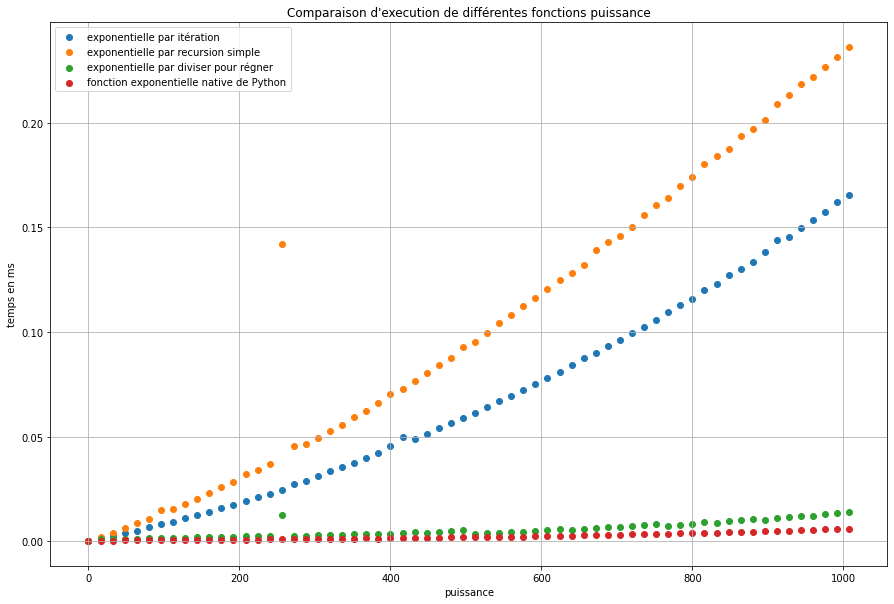

In [27]:
import matplotlib.pyplot as plt

# faisons une liste des puissance et du pas
puissances = [i for i in range(0, 1024, 16)]
resultsA=[]
resultsB=[]
resultsC=[]
resultsD=[]
# On teste sur ce nombre
number = 60
for p in puissances:
    # Cas de la puissance recursive itérative
    stats = %timeit -q -o -n 10 puissanceA(number, p)
    resultsA.append(stats.average)
     # Cas de la puissance recursive basique
    stats = %timeit -q -o -n 10 puissanceB(number, p)
    resultsB.append(stats.average)
    # Cas de la puissance recursive diviser pour régner
    stats = %timeit -q -o -n 10 puissanceC(number, p)
    resultsC.append(stats.average)
    # Cas de la puissance native en Python
    stats = %timeit -q -o -n 10 number**p
    resultsD.append(stats.average)

# création du graphique de points
x = [p for p in puissances]
yA = [r*1000 for r in resultsA]
yB = [r*1000 for r in resultsB]
yC = [r*1000 for r in resultsC]
yD = [r*1000 for r in resultsD]

plt.figure(figsize=(15,10))
plt.scatter(x,yA, label="exponentielle par itération")
plt.scatter(x,yB, label="exponentielle par recursion simple")
plt.scatter(x,yC, label="exponentielle par diviser pour régner")
plt.scatter(x,yD, label="fonction exponentielle native de Python")
plt.grid(which='both')
plt.title("Comparaison d'execution de différentes fonctions puissance")
plt.xlabel('puissance')
plt.ylabel('temps en ms')
plt.legend(loc='upper left')
plt.show()

Des commentaires ?

**Nano projet:**
    
Utiliser la bibliothèque [PrettyTable](https://pypi.org/project/prettytable/) pour afficher, sous forme de tableau, le coefficient multiplicateur par rapport à la fonction puissance native, pour l'ensemble des calculs de puissance. (On prendra uniquement la partie entière)

Exemple : 
```
+-----------+------+---------+-------+
|           |60**16| 60**32  | 60**48|
+-----------+------+---------+-------+
|  iteratif | 10   |  12     |  14   |
|  recursif | 12   |  14     |  16   |
|   dpr     | 1    |  1      |  2    |
+-----------+------+---------+-------+
```

In [18]:
from prettytable import PrettyTable
x = PrettyTable()
# a vous de coder
print(x)

++
||
++
++
